In [376]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [377]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

## 1. 법정동 코드 가공

In [378]:
locCode = pd.read_excel('../data/law_code.xlsx', encoding='cp949')
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


In [379]:
locCode_seoul = locCode[locCode['시도명']=='서울특별시']
locCode_seoul.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


In [380]:
locCode_seoul = locCode_seoul[~locCode_seoul['읍면동명'].isnull()]
locCode_seoul.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN
5,1111010400,서울특별시,종로구,효자동,NaN,19880423,NaN
6,1111010500,서울특별시,종로구,창성동,NaN,19880423,NaN


In [381]:
locCode_seoul = locCode_seoul[['법정동코드','시도명','시군구명','읍면동명','생성일자']]
locCode_seoul.head()

,법정동코드,시도명,시군구명,읍면동명,생성일자
2,1111010100,서울특별시,종로구,청운동,19880423
3,1111010200,서울특별시,종로구,신교동,19880423
4,1111010300,서울특별시,종로구,궁정동,19880423
5,1111010400,서울특별시,종로구,효자동,19880423
6,1111010500,서울특별시,종로구,창성동,19880423


In [382]:
locCode_seoul.reset_index(drop=True, inplace=True)
locCode_seoul.head()

,법정동코드,시도명,시군구명,읍면동명,생성일자
0,1111010100,서울특별시,종로구,청운동,19880423
1,1111010200,서울특별시,종로구,신교동,19880423
2,1111010300,서울특별시,종로구,궁정동,19880423
3,1111010400,서울특별시,종로구,효자동,19880423
4,1111010500,서울특별시,종로구,창성동,19880423


In [383]:
# locCode_seoul['생성일자'] = pd.to_datetime(locCode_seoul['생성일자'], format='%Y-%m-%d', errors='raise') #datetime형식으로

In [384]:
locCode_seoul.rename(columns={'읍면동명':'법정동'},inplace=True)
locCode_seoul.head()

,법정동코드,시도명,시군구명,법정동,생성일자
0,1111010100,서울특별시,종로구,청운동,19880423
1,1111010200,서울특별시,종로구,신교동,19880423
2,1111010300,서울특별시,종로구,궁정동,19880423
3,1111010400,서울특별시,종로구,효자동,19880423
4,1111010500,서울특별시,종로구,창성동,19880423


In [385]:
locCode_seoul['법정동코드'] = locCode_seoul['법정동코드'].apply(str)
locCode_seoul.head()

,법정동코드,시도명,시군구명,법정동,생성일자
0,1111010100,서울특별시,종로구,청운동,19880423
1,1111010200,서울특별시,종로구,신교동,19880423
2,1111010300,서울특별시,종로구,궁정동,19880423
3,1111010400,서울특별시,종로구,효자동,19880423
4,1111010500,서울특별시,종로구,창성동,19880423


In [386]:
locCode_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   법정동코드   467 non-null    object
 1   시도명     467 non-null    object
 2   시군구명    467 non-null    object
 3   법정동     467 non-null    object
 4   생성일자    467 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 18.4+ KB


## 2. 실거래가 데이터 가공

In [387]:
apt = pd.read_csv('../data/2019_seoul_apartment.csv', encoding="cp949")

In [388]:
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번
0,2008,2019,1,7,사직동,"105,000",광화문풍림스페이스본(101동~105동),97.61,11110,10,9
1,2008,2019,1,11,사직동,"162,000",광화문풍림스페이스본(106동),163.33,11110,11,9-1
2,2008,2019,1,19,사직동,"119,000",광화문풍림스페이스본(101동~105동),131.44,11110,13,9
3,2008,2019,1,30,사직동,"119,000",광화문풍림스페이스본(101동~105동),147.31,11110,1,9
4,2004,2019,1,25,내수동,"160,000",경희궁의아침4단지,150.48,11110,14,73


In [389]:
# 거래금액 컬럼의 콤마(,) 제거 후 데이터 타입 변경..int64로
apt['거래금액']=apt['거래금액'].str.replace(',','')
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73


In [390]:
apt = apt.astype({'거래금액': np.int64}) #실수형으로 바꿈
apt.dtypes

건축년도       int64
거래년도       int64
거래월        int64
거래일자       int64
법정동       object
거래금액       int64
아파트이름     object
전용면적     float64
지역코드       int64
층          int64
지번        object
dtype: object

In [391]:
# 전용면적(제곱미터)를 평으로 변환(나누기 3.306)하여 전용면적(평) 컬럼 생성 후 소숫점 둘쨰자리까지 표시합니다.
apt['전용면적(평)'] = round((apt['전용면적']/3.306),2)
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평)
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52


In [392]:
# 전용면적을 범주화 하기 위해 전용면적(평) 컬럼을 정수형으로 바꾼 새로운 컬럼을 생성합니다.
# 컬럼명 전용면적2(평)
apt['전용면적(평)2'] = round(apt['전용면적(평)'])
apt = apt.astype({'전용면적(평)2': np.int64})
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,30
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,40
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,45
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,46


In [393]:
# 전용면적을 범주화 합니다.
# 컬럼명은 전용면적(평)3
bins=np.arange(0,86,5)
apt['전용면적(평)3'] = pd.cut(apt['전용면적(평)2'], bins)
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,30,"(25, 30]"
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]"
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,40,"(35, 40]"
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,45,"(40, 45]"
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,46,"(45, 50]"


In [394]:
# 범주화된 전용면적의 고유값을 확인합니다.
apt['전용면적(평)3'].unique()

[(25, 30], (45, 50], (35, 40], (40, 45], (0, 5], ..., (65, 70], (60, 65], (55, 60], (80, 85], (75, 80]]
Length: 17
Categories (17, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (65, 70] < (70, 75] < (75, 80] < (80, 85]]

In [395]:
apt['지역코드'] = apt['지역코드'].apply(str)
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,30,"(25, 30]"
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]"
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,40,"(35, 40]"
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,45,"(40, 45]"
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,46,"(45, 50]"


## 3. 데이타 프레임 병합

In [396]:
locCode_seoul.sort_values(by='법정동', inplace=True)
locCode_seoul.reset_index(drop=True, inplace=True)
locCode_seoul.head()
#locCode_seoul.info()

,법정동코드,시도명,시군구명,법정동,생성일자
0,1171010700,서울특별시,송파구,가락동,19880701
1,1153010300,서울특별시,구로구,가리봉동,19880423
2,1154510100,서울특별시,금천구,가산동,19950301
3,1150010400,서울특별시,강서구,가양동,19930401
4,1111014600,서울특별시,종로구,가회동,19880423


In [397]:
locCode_seoul['지역코드'] = locCode_seoul['법정동코드'].str.slice(start=0, stop=5)
locCode_seoul['지역코드_법정동'] = locCode_seoul['지역코드']+locCode_seoul['법정동']
# locCode_seoul['법정동_읍면동'] = locCode_seoul['법정동코드'].str.slice(start=5, stop=8)
# locCode_seoul.sort_values(by='지역코드')
locCode_seoul.head()

,법정동코드,시도명,시군구명,법정동,생성일자,지역코드,지역코드_법정동
0,1171010700,서울특별시,송파구,가락동,19880701,11710,11710가락동
1,1153010300,서울특별시,구로구,가리봉동,19880423,11530,11530가리봉동
2,1154510100,서울특별시,금천구,가산동,19950301,11545,11545가산동
3,1150010400,서울특별시,강서구,가양동,19930401,11500,11500가양동
4,1111014600,서울특별시,종로구,가회동,19880423,11110,11110가회동


In [398]:
apt.sort_values(by='법정동', inplace=True)
apt.reset_index(drop=True, inplace=True)
apt.head()
#apt.info()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3
0,1985,2019,3,16,가락동,95000,삼환,121.040,11710,10,176,36.61,37,"(35, 40]"
1,2005,2019,8,14,가락동,74500,동궁리치웰(102동),83.660,11710,7,196,25.31,25,"(20, 25]"
2,2007,2019,8,14,가락동,103000,래미안파크팰리스,59.968,11710,12,165,18.14,18,"(15, 20]"
3,1986,2019,8,15,가락동,75500,우성,43.790,11710,9,96-1,13.25,13,"(10, 15]"
4,1995,2019,8,16,가락동,53500,풍림1,59.940,11710,6,142,18.13,18,"(15, 20]"


In [399]:
apt['법정동'] = apt['법정동'].str.slice(start=1)
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3
0,1985,2019,3,16,가락동,95000,삼환,121.040,11710,10,176,36.61,37,"(35, 40]"
1,2005,2019,8,14,가락동,74500,동궁리치웰(102동),83.660,11710,7,196,25.31,25,"(20, 25]"
2,2007,2019,8,14,가락동,103000,래미안파크팰리스,59.968,11710,12,165,18.14,18,"(15, 20]"
3,1986,2019,8,15,가락동,75500,우성,43.790,11710,9,96-1,13.25,13,"(10, 15]"
4,1995,2019,8,16,가락동,53500,풍림1,59.940,11710,6,142,18.13,18,"(15, 20]"


In [400]:
apt['지역코드_법정동'] = apt['지역코드']+apt['법정동']
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,지역코드_법정동
0,1985,2019,3,16,가락동,95000,삼환,121.040,11710,10,176,36.61,37,"(35, 40]",11710가락동
1,2005,2019,8,14,가락동,74500,동궁리치웰(102동),83.660,11710,7,196,25.31,25,"(20, 25]",11710가락동
2,2007,2019,8,14,가락동,103000,래미안파크팰리스,59.968,11710,12,165,18.14,18,"(15, 20]",11710가락동
3,1986,2019,8,15,가락동,75500,우성,43.790,11710,9,96-1,13.25,13,"(10, 15]",11710가락동
4,1995,2019,8,16,가락동,53500,풍림1,59.940,11710,6,142,18.13,18,"(15, 20]",11710가락동


In [407]:
merged = pd.merge(locCode_seoul,apt, on='지역코드_법정동')

In [408]:
merged.drop(columns='법정동_y',inplace=True)
merged.drop(columns='지역코드_y',inplace=True)

In [409]:
merged.rename(columns={'법정동_x':'법정동','지역코드_x':'지역코드'},inplace=True)
merged.head()

,법정동코드,시도명,시군구명,법정동,생성일자,지역코드,지역코드_법정동,건축년도,거래년도,거래월,거래일자,거래금액,아파트이름,전용면적,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3
0,1171010700,서울특별시,송파구,가락동,19880701,11710,11710가락동,1985,2019,3,16,95000,삼환,121.040,10,176,36.61,37,"(35, 40]"
1,1171010700,서울특별시,송파구,가락동,19880701,11710,11710가락동,2005,2019,8,14,74500,동궁리치웰(102동),83.660,7,196,25.31,25,"(20, 25]"
2,1171010700,서울특별시,송파구,가락동,19880701,11710,11710가락동,2007,2019,8,14,103000,래미안파크팰리스,59.968,12,165,18.14,18,"(15, 20]"
3,1171010700,서울특별시,송파구,가락동,19880701,11710,11710가락동,1986,2019,8,15,75500,우성,43.790,9,96-1,13.25,13,"(10, 15]"
4,1171010700,서울특별시,송파구,가락동,19880701,11710,11710가락동,1995,2019,8,16,53500,풍림1,59.940,6,142,18.13,18,"(15, 20]"


## 4. 데이타 분석


# 거래수가 가장 많은 아파트가 어디일까!

In [410]:
merged.head()

apt_year = merged.pivot_table(index=['지역코드_법정동','아파트이름'], values='거래년도', aggfunc='count')

In [420]:
apt_year.rename(columns={'거래년도':'거래 수'},inplace=True)
apt_year.sort_values(by='거래 수', ascending=False, inplace=True)
apt_year_50 = apt_year.head(50)
apt_year_50
#apt_year.reset_index(inplace=True)


,지역코드_법정동,아파트이름,거래 수
0,11710신천동,파크리오,388
1,11710잠실동,잠실엘스,279
2,11710잠실동,리센츠,249
3,11740고덕동,고덕래미안 힐스테이트아파트,238
4,11710문정동,훼밀리,230
5,11545시흥동,관악산벽산타운5,209
6,11710잠실동,주공아파트 5단지,197
7,11305미아동,에스케이북한산시티,195
8,11710잠실동,트리지움,190
9,11680개포동,개포주공 1단지,190


# 몇 평대가 가장 거래가 많을까! 

In [428]:
merged.head()
bins=np.arange(0,86,10)
merged['전용면적(평)3'] = pd.cut(merged['전용면적(평)2'], bins)
merged.head()
# merged.pivot_table(by=['전용면적(평)3','지역코드_법정동','아파트이름'], values='거래년도', aggfunc='count')
area_apart=merged.pivot_table(index=['전용면적(평)3'], values='거래년도', aggfunc='count')
area_apart.rename(columns={'거래년도':'거래 수'},inplace=True)


,거래 수
전용면적(평)3,
"(0, 10]",3252
"(10, 20]",25828
"(20, 30]",28595
"(30, 40]",7689
"(40, 50]",2566
"(50, 60]",542
"(60, 70]",247
"(70, 80]",140


In [435]:
area_apart.reset_index(inplace=True)


In [436]:
area_apart

,전용면적(평)3,거래 수
0,"(0, 10]",3252
1,"(10, 20]",25828
2,"(20, 30]",28595
3,"(30, 40]",7689
4,"(40, 50]",2566
5,"(50, 60]",542
6,"(60, 70]",247
7,"(70, 80]",140


## 5. 시각화
#### 시각화 그래프는 7개 이상 나와야 합니다.
    - 각각의 그래프마다 분석에 있어서 세웠던 전략과 시각화 목적을 간단한 코멘트를 달아주세요
#### 수업시간에 언급하지 않은 새로운 패턴의 그래프는 3개 이상 사용하시기 바랍니다.
    - 그래프에 대한 간단한 설명과 함께 코멘트로 직접 달아주세요

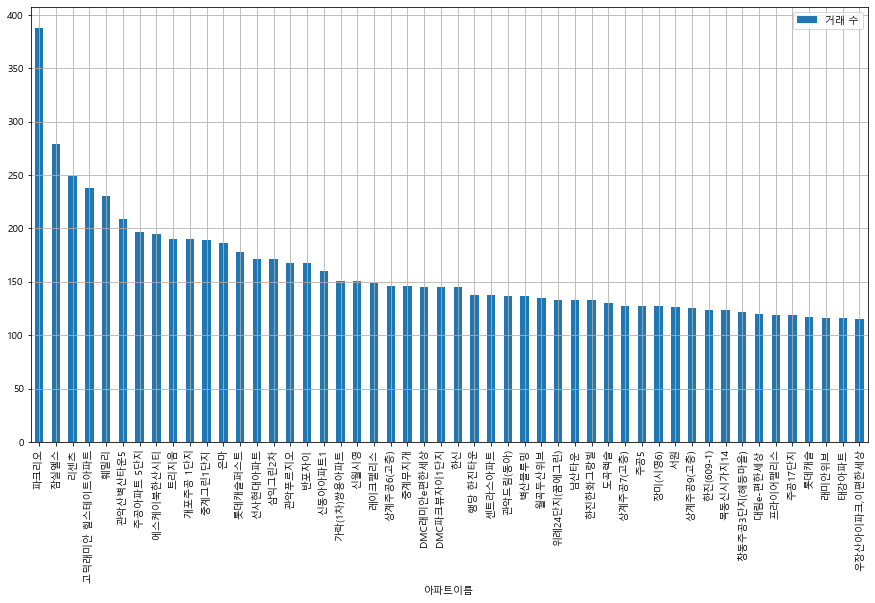

In [439]:
apt_year_100.plot(x='아파트이름', y='거래 수', figsize=(15.0,8.0), kind='bar')
plt.grid(b=True, linestyle='-')
plt.show()

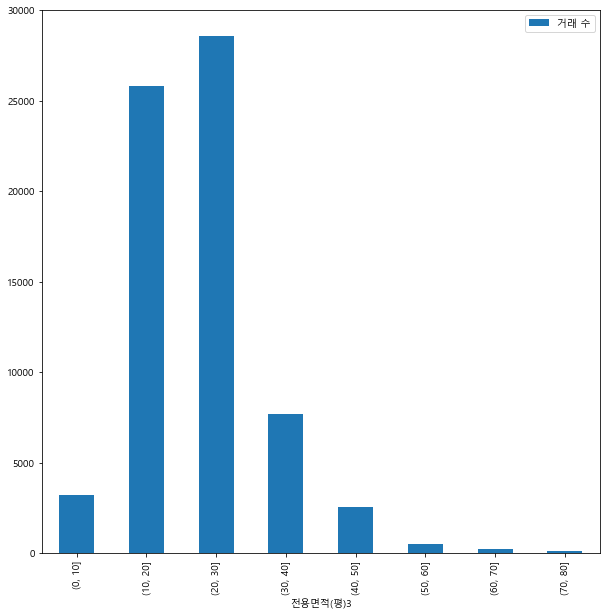

In [437]:
area_apart['전용면적(평)3'] = area_apart['전용면적(평)3'].apply(str)
area_apart.plot(x = '전용면적(평)3', y='거래 수', figsize=(10.0,10.0), kind='bar')
plt.show()

#### 작업시간은 오후 3시까지 생각하고 있습니다.
    - 최종 발표시간은 4시입니다.